In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

Research on reversion of Kelp

In [2]:
for i, day in enumerate([0, 1, 2]):
    file_name = f"../round3_new/round-3-island-data-bottle/prices_round_3_day_{day}.csv"
    df_tmp = pd.read_csv(file_name, sep=';')
    df_tmp['day'] = day
    if i > 0:
        df = pd.concat([df, df_tmp])
    else:
        df = df_tmp
df = df.reset_index(drop=True)

In [3]:
df_kelp = df[df["product"] == "KELP"].reset_index(drop=True).copy()

Calculate the reversion of filtered mid price. The thresholding volume is 15.

In [4]:
def find_min_i_bid(row):
    for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 15:
            return pd.Series([row[f'bid_price_{i}'], row[f'bid_volume_{i}']])
    return pd.Series([np.nan, np.nan])

def find_min_i_ask(row):
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 15:
            return pd.Series([row[f'ask_price_{i}'], row[f'ask_volume_{i}']])
    return pd.Series([np.nan, np.nan])

df_kelp[['filtered_bid_price', 'filtered_bid_volume']] = df_kelp.apply(find_min_i_bid, axis=1)
df_kelp[['filtered_ask_price', 'filtered_ask_volume']] = df_kelp.apply(find_min_i_ask, axis=1)


In [5]:
df_kelp

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,filtered_bid_price,filtered_bid_volume,filtered_ask_price,filtered_ask_volume
0,0,0,KELP,2028.0,30.0,NaN,NaN,NaN,NaN,2032,...,NaN,NaN,NaN,NaN,2030.0,0.0,2028.0,30.0,2032.0,30.0
1,0,100,KELP,2030.0,4.0,2028.0,31.0,NaN,NaN,2032,...,NaN,NaN,NaN,NaN,2031.0,0.0,2028.0,31.0,2032.0,31.0
2,0,200,KELP,2029.0,1.0,2028.0,21.0,NaN,NaN,2032,...,NaN,NaN,NaN,NaN,2030.5,0.0,2028.0,21.0,2032.0,22.0
3,0,300,KELP,2029.0,25.0,NaN,NaN,NaN,NaN,2032,...,NaN,NaN,NaN,NaN,2030.5,0.0,2029.0,25.0,2032.0,25.0
4,0,400,KELP,2029.0,2.0,2028.0,23.0,NaN,NaN,2030,...,2032.0,25.0,NaN,NaN,2029.5,0.0,2028.0,23.0,2032.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2,999500,KELP,2040.0,28.0,NaN,NaN,NaN,NaN,2042,...,2044.0,28.0,NaN,NaN,2041.0,0.0,2040.0,28.0,2044.0,28.0
29996,2,999600,KELP,2040.0,30.0,NaN,NaN,NaN,NaN,2042,...,2044.0,30.0,NaN,NaN,2041.0,0.0,2040.0,30.0,2044.0,30.0
29997,2,999700,KELP,2040.0,28.0,NaN,NaN,NaN,NaN,2043,...,NaN,NaN,NaN,NaN,2041.5,0.0,2040.0,28.0,2043.0,28.0
29998,2,999800,KELP,2040.0,29.0,NaN,NaN,NaN,NaN,2043,...,NaN,NaN,NaN,NaN,2041.5,0.0,2040.0,29.0,2043.0,29.0


In [6]:
df_kelp['filtered_mid'] = (df_kelp["filtered_ask_price"] + df_kelp["filtered_bid_price"]) / 2

In [7]:
df_kelp['filtered_mid'] = df_kelp['filtered_mid'].fillna(df_kelp['mid_price'])

In [8]:
df_kelp['filtered_mid'].isnull().sum()

0

In [9]:
df_kelp[['filtered_bid_volume', 'filtered_ask_volume', 'filtered_bid_price', 'filtered_ask_price']] = df_kelp[['filtered_bid_volume', 'filtered_ask_volume', 'filtered_bid_price', 'filtered_ask_price']] .fillna(0)

In [10]:
df_kelp['rtn'] = df_kelp['filtered_mid'].pct_change()
df_kelp['rtn_lag_1'] = df_kelp['rtn'].shift()

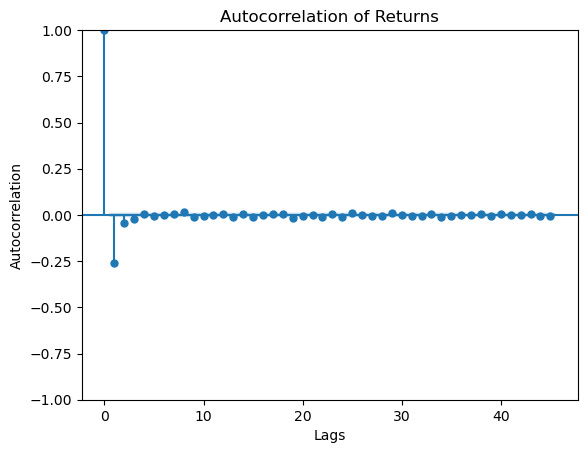

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(df_kelp['rtn'].dropna())
plt.title('Autocorrelation of Returns')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

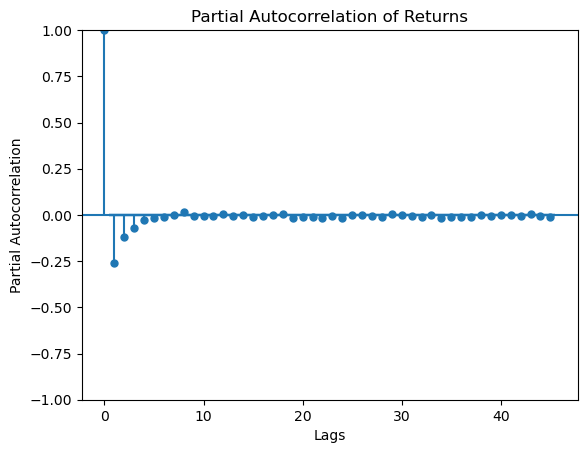

In [12]:
plot_pacf(df_kelp['rtn'].dropna())
plt.title('Partial Autocorrelation of Returns')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [13]:
df_kelp['imb'] = (df_kelp['filtered_bid_volume'] - df_kelp['filtered_ask_volume']) / (df_kelp['filtered_bid_volume'] + df_kelp['filtered_ask_volume'])
df_kelp.loc[(df_kelp['filtered_bid_volume'] == 0) & (df_kelp['filtered_ask_volume'] == 0), 'imb'] = 0

In [14]:
df_kelp['rtn'][2:].corr(df_kelp['rtn_lag_1'][2:])

-0.2584563956807354

In [15]:
df_kelp['rtn'].corr(df_kelp['imb'].shift())

0.02747476204630306

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_kelp[['rtn', 'imb']].shift().values[2:], df_kelp['rtn'].values[2:].reshape(-1, 1))


LinearRegression()

In [17]:
lr.coef_, lr.intercept_

(array([[-2.57862025e-01,  4.47408647e-05]]), array([5.11797187e-08]))

<Axes: >

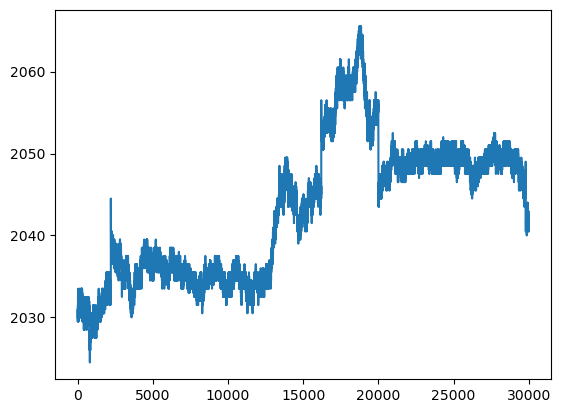

In [18]:
df_kelp['mid_price'].plot()

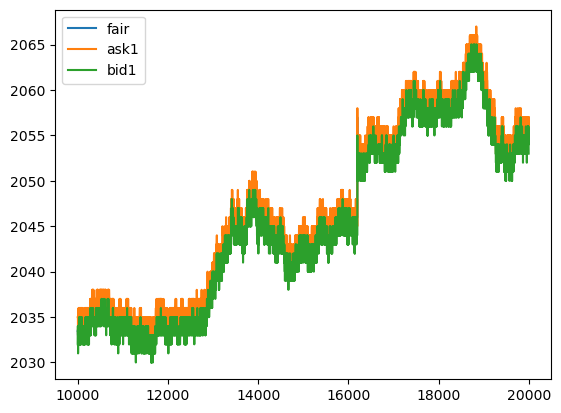

In [19]:
begin = 10000
end = 20000
plt.plot(df_kelp['filtered_mid'][begin:end], label='fair')
plt.plot(df_kelp['ask_price_1'][begin:end], label='ask1')
plt.plot(df_kelp['bid_price_1'][begin:end], label='bid1')
plt.legend()
plt.show()